# Basics with Nengo

## Part 1 - 2 Dimensional Representation

Ensembles of neurons represent information. In Nengo, we represent that information with real-valued vectors, a list of numbers, say. 

Here we will represent a 2D vector with a singular ensemble of leaky integrate & fire neurons.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import nengo
%load_ext nengo.ipynb

<IPython.core.display.Javascript object>

## Build the network 

In [2]:
mindmodel = nengo.Network(label="2D Space")
with mindmodel:
    neurons = nengo.Ensemble(100, dimensions=2)

## Provide input 

In [3]:
import numpy as np
with mindmodel:
    sin = nengo.Node(output=np.sin)
    cos = nengo.Node(output=np.cos)

## Connect input to ensemble

Here we connect the input nodes representing the sine and cosines

In [4]:
with mindmodel:
    nengo.Connection(sin, neurons[0])
    nengo.Connection(cos, neurons[1])

## Probe outputs

Anything that is probed will collect the data if produces over time, allowing us to analyze and visualzie it later.


In [6]:
# Lets get the data
with mindmodel:
    sin_probe = nengo.Probe(sin, "output")
    cos_probe = nengo.Probe(cos, "output")
    neurons_probe = nengo.Probe(neurons, "decoded_output", synapse=0.01)

## Finally, lets run the model

To run the mode, we have to create a simulator. Then, we can run that simulator continuously without affecting the original model.

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


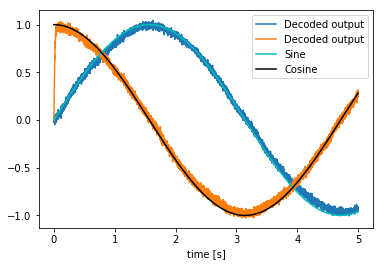

In [8]:
# Create a simulator
with nengo.Simulator(mindmodel) as sim:
    sim.run(5) # make it run for 5 seconds
    
# Lets plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[neurons_probe], label="Decoded output")
plt.plot(sim.trange(), sim.data[sin_probe], 'c', label="Sine")
plt.plot(sim.trange(), sim.data[cos_probe], 'k', label="Cosine")
plt.legend()
plt.xlabel("time [s]")

## Part 2: Firing many neurons

Construct and manipulate a population of neurons. There are 100 leaky and fire neurons. The neuron tuning properties have ben randomly selected.